In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import NearestNDInterpolator
%matplotlib inline

In [2]:
gridDS = Dataset('../ROMSgrid.nc')

DXU = np.array(gridDS.variables['DXU'])
DYU = np.array(gridDS.variables['DXU'])


In [3]:
n = 100

ds = Dataset('../TempGradData_0p25degCrse_data_crseAtm_inst_2p5deg.nc')

ds.variables.keys()

ds2 = Dataset('../../../Downloaded/hseoRun/ROMS_data/surf_data_temp_ROMS_2016.nc')
sst_orig = np.array(ds2.variables['temp_sur'][n,:,:])
mask = abs(sst_orig) > 1000

ds3 = Dataset('../../../Downloaded/roms-natl1-grid_nolake.nc')
f = np.array(ds3.variables['f'])


ds4 = Dataset('../TempData_0p25degCrse_data_crseAtm_inst_2p5deg.nc')
crs_sst = np.array(ds4.variables['crs_sst'][n,:,:]) #-10 #+ 273.15
sst = np.array(ds4.variables['sst'][n,:,:]) #-10 #+ 273.15
sst_prime = sst - crs_sst

ds5 = Dataset('../PBLheightData_0p25degCrse_data_crseAtm_inst_2p5deg.nc')
H = np.array(ds5.variables['crs_PBLH'][n,:,:]) 
PBLH = np.array(ds5.variables['PBLH'][n,:,:])
PBLH_prime = PBLH - H

dx_crs_sst = (np.roll(crs_sst,-1,axis=1) - np.roll(crs_sst,1,axis=1))/(2*DXU)
dx_sst_prime = (np.roll(sst_prime,-1,axis=1) - np.roll(sst_prime,1,axis=1))/(2*DXU)

dy_crs_sst = (np.roll(crs_sst,-1,axis=0) - np.roll(crs_sst,1,axis=0))/(2*DYU)
dy_sst_prime = (np.roll(sst_prime,-1,axis=0) - np.roll(sst_prime,1,axis=0))/(2*DYU)

grad_crs_sst = np.sqrt(dx_crs_sst**2 + dy_crs_sst**2)
grad_sst_prime = np.sqrt(dx_sst_prime**2 + dy_sst_prime**2)

grad_crs_sst[mask] = float('nan')
grad_sst_prime[mask] = float('nan')


#myFac = 800/grad_crs_sst
#H = 300 #+ 1000*grad_crs_sst/0.005

#H = np.sqrt(2*np.pi/f * 0.1)

dx_h_prime= np.array(ds.variables['dx_h_prime'][n,:,:])# *1/1000 *  0.0 #H
dy_h_prime= np.array(ds.variables['dy_h_prime'][n,:,:])# *1/1000 *  0.0 # H
dx_sst_prime= np.array(ds.variables['dx_sst_prime'][n,:,:])
dy_sst_prime= np.array(ds.variables['dy_sst_prime'][n,:,:])
dx_crs_sst= np.array(ds.variables['dx_crs_sst'][n,:,:])
dy_crs_sst= np.array(ds.variables['dy_crs_sst'][n,:,:])

ds.close()
ds2.close()
ds3.close()
ds4.close()
ds5.close()


dx_h_prime[mask] = float('nan')
dy_h_prime[mask] = float('nan')
dx_sst_prime[mask] = float('nan')
dy_sst_prime[mask] = float('nan')
dx_crs_sst[mask] = float('nan')
dy_crs_sst[mask] = float('nan')


ds_atm_orig = Dataset('../ROMS_withWRF_0p25degCrse_data_inst.nc')
ds_atm_crs = Dataset('../ROMS_withWRF_0p25degCrse_data_crseAtm_inst_2p5deg.nc')

ua = np.array(ds_atm_orig.variables['ua'][n,:,:])

uo = np.array(ds_atm_orig.variables['uo'][n,:,:])
vo = np.array(ds_atm_orig.variables['vo'][n,:,:])

ua_crs = np.array(ds_atm_crs.variables['ua'][n,:,:])
ua_prime = ua - ua_crs
ua_prime[mask] = float('nan')
uo[mask] =float('nan')
vo[mask] =float('nan')

va = np.array(ds_atm_orig.variables['va'][n,:,:])
va_crs = np.array(ds_atm_crs.variables['va'][n,:,:])
va_prime = va - va_crs
va_prime[mask] = float('nan')
crs_sst[mask] = float('nan')

PBLH[mask] = float('nan')
dx_h_prime*=0#1e-4
dy_h_prime*=0#1e-4
H*= 0.1

In [4]:
# crs_sst = np.array(ds4.variables['crs_sst'][n,:,:]) + 273.15
# sst = np.array(ds4.variables['sst'][n,:,:]) + 273.15
# sst_prime = sst - crs_sst




In [5]:
np.nanmax(grad_crs_sst)

0.0031114106852824317

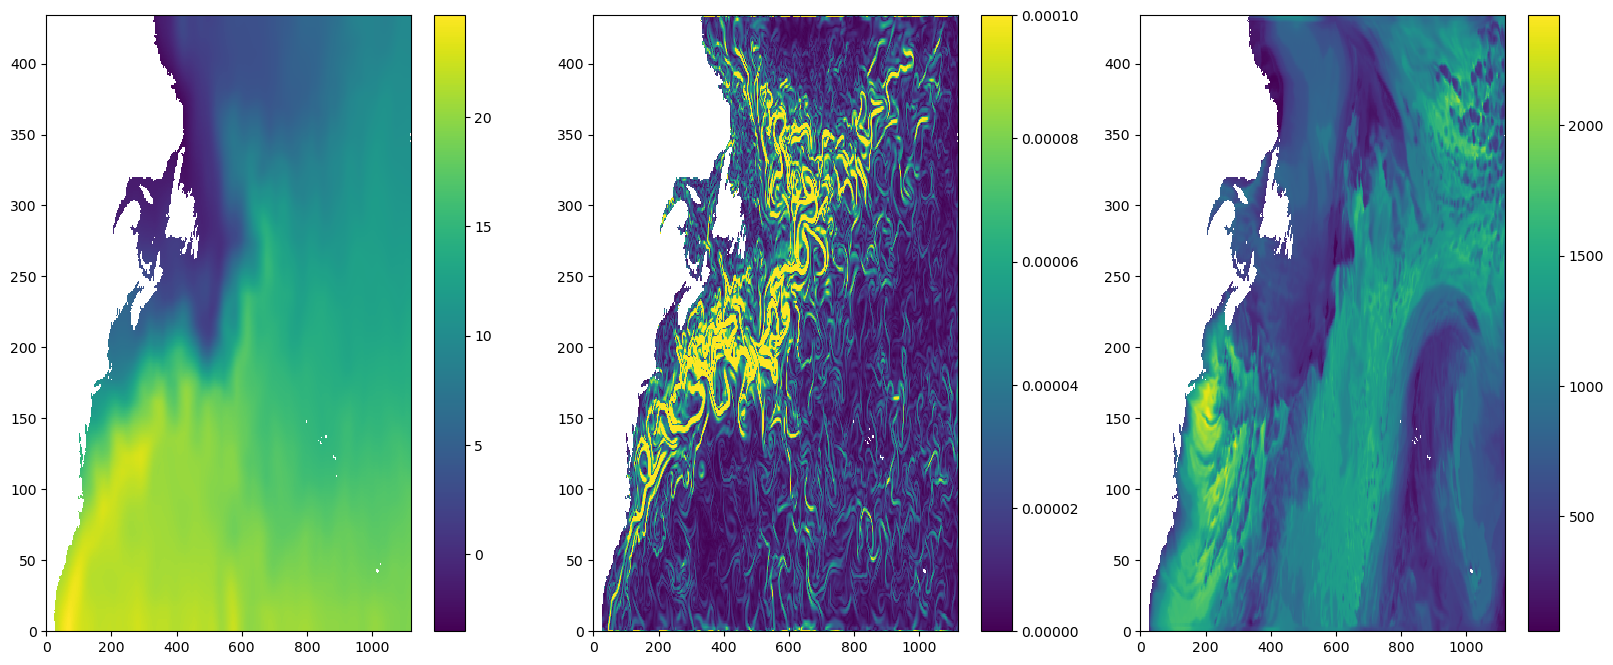

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols=3, figsize = (20,8))

v = 1e-4
ax = axes[0]
pltArr = crs_sst
m = ax.pcolormesh(pltArr)#, vmin= 0, vmax=v)#, cmap='seismic')
plt.colorbar(m, ax=ax)

ax = axes[1]
pltArr = grad_sst_prime
m = ax.pcolormesh(pltArr, vmin= 0, vmax=v)#, cmap='seismic')
plt.colorbar(m, ax=ax)

ax = axes[2]
pltArr = PBLH
m = ax.pcolormesh(pltArr)#, vmin= 200, vmax=400)#, cmap='seismic')
plt.colorbar(m, ax=ax)


In [7]:
np.nanmax(H)

210.77402932136576

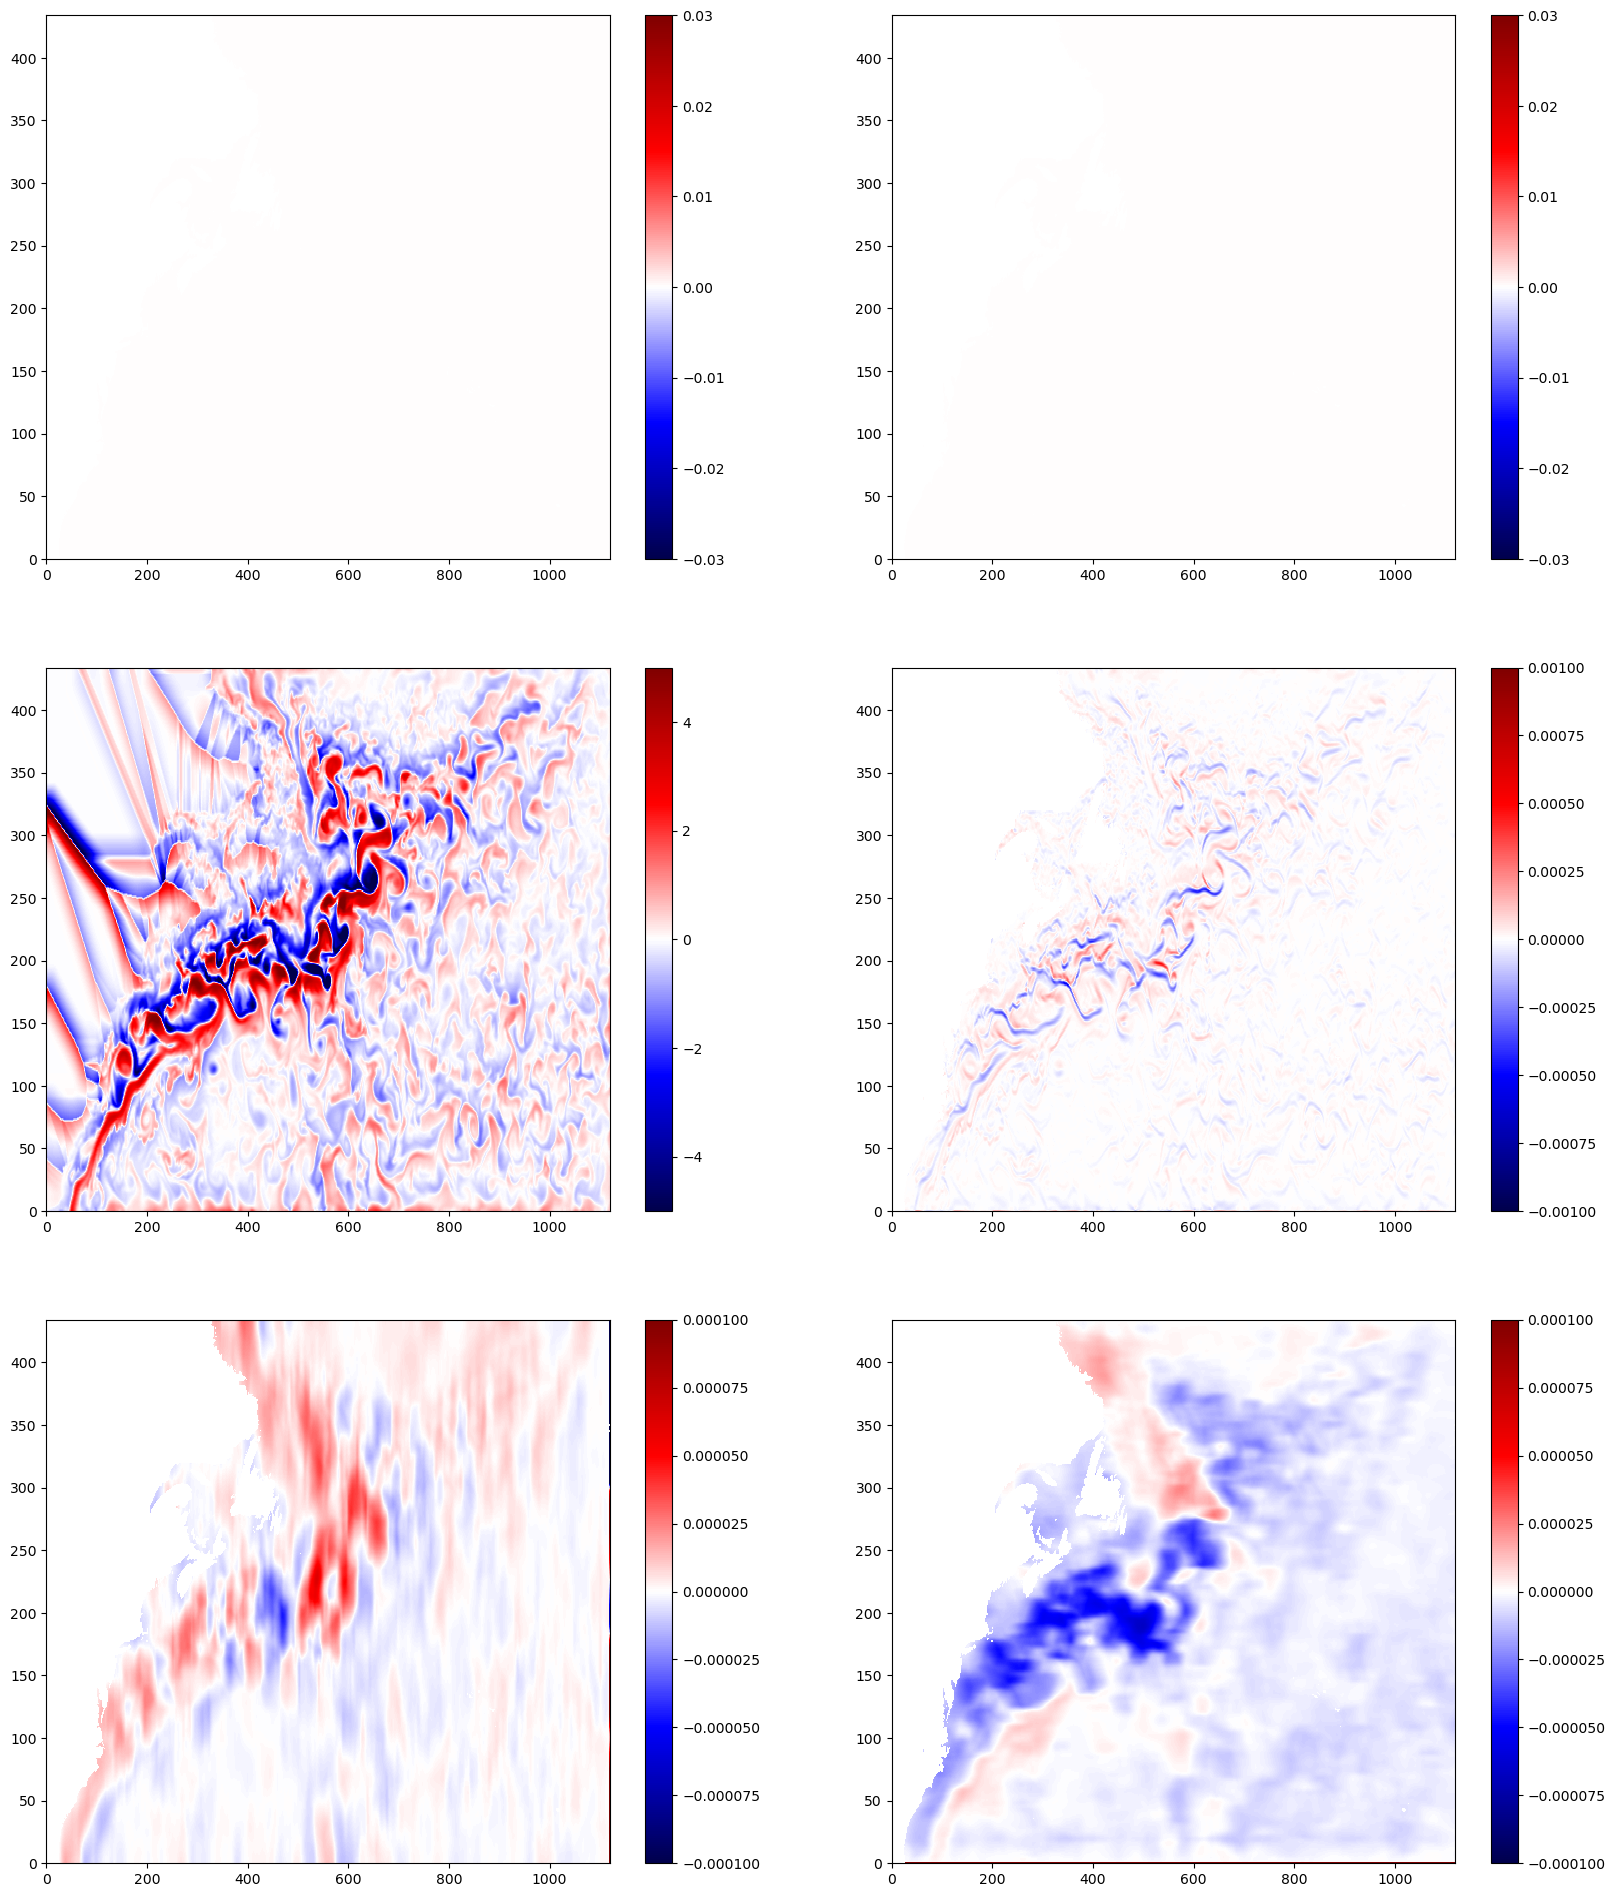

In [8]:
fig, axes = plt.subplots(nrows = 3, ncols=2, figsize = (20,24))

v = 0.03
pltArr = dx_h_prime.copy()
ax = axes[0,0]
m = ax.pcolormesh(pltArr, vmin= -v, vmax=v, cmap='seismic')
plt.colorbar(m, ax=ax)

pltArr = dy_h_prime.copy()
ax = axes[0,1]
m = ax.pcolormesh(pltArr, vmin= -v, vmax=v, cmap='seismic')
plt.colorbar(m, ax=ax)


v = 5
pltArr = sst_prime.copy()
ax = axes[1,0]
m = ax.pcolormesh(pltArr, vmin= -v, vmax=v, cmap='seismic')
plt.colorbar(m, ax=ax)

v = 1e-3
pltArr = dy_sst_prime.copy()
ax = axes[1,1]
m = ax.pcolormesh(pltArr, vmin= -v, vmax=v, cmap='seismic')
plt.colorbar(m, ax=ax)


v= 1e-4
pltArr = dx_crs_sst.copy()
ax = axes[2,0]
m = ax.pcolormesh(pltArr, vmin= -v, vmax=v, cmap='seismic')
plt.colorbar(m, ax=ax)

pltArr = dy_crs_sst.copy()
ax = axes[2,1]
m = ax.pcolormesh(pltArr, vmin= -v, vmax=v, cmap='seismic')
plt.colorbar(m, ax=ax)

In [9]:
eta = 1/(24*3600)
velNormFac = 1 #0.33333 * 3/10

C = 1/(eta**2 + f**2)
M11 = C * eta
M12 = C * f
M21 = C * -f
M22 = C * eta


M = np.array([[M11, M12],
              [M21, M22]], dtype=float)

M = np.swapaxes(M,0,2)
M = np.swapaxes(M,1,3)

In [10]:
6/1000

0.006

In [11]:
nn = 1/288  #1/(15+273)
alpha = 0.006 #K/m
gamma = 0.30 

g = 9.81

#A = -g * (2 - nn* (crs_sst+273.15) + nn * alpha * H)

A = -g * (1 - nn*(crs_sst-15) + nn * alpha * H)

B = -g * (1-2*gamma/3) * nn * H /2

#A = 0

In [12]:
print( np.nanmean((1 - nn*(crs_sst-15) + nn * alpha * H))*-g, 
       np.nanmean(((1-2*gamma/3) * nn * H /2))*-g, 
       np.nanmean(A), 
       np.nanmean(B))

-9.891303653225464 -1.084755220167136 -9.891303653225464 -1.084755220167136


In [13]:
np.max(crs_sst)

nan

In [14]:
X = A * dx_h_prime - B * dx_sst_prime
Y = A * dy_h_prime - B * dy_sst_prime

#X =  - B * dx_sst_prime
#Y =  - B * dy_sst_prime

XYmat = np.array([[X],
                  [Y]], dtype=float)

XYmat = np.swapaxes(XYmat,0,2)
XYmat = np.swapaxes(XYmat,1,3)

In [15]:
#vel = np.dot(M.T, XYmat.T)

In [16]:
M.shape

(434, 1120, 2, 2)

In [17]:
XYmat.shape

(434, 1120, 2, 1)

In [18]:
vel = np.matmul(M, XYmat)

In [19]:
vel.shape

(434, 1120, 2, 1)

In [20]:
U = vel[:,:,0,0] * velNormFac 
V = vel[:,:,1,0] * velNormFac 

In [21]:
U.shape

(434, 1120)

In [22]:
# fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (20,8))

# v = 8
# pltArr = U.copy()
# ax = axes[0]
# m = ax.pcolormesh(pltArr, vmin= -v, vmax=v, cmap='seismic')
# plt.colorbar(m, ax=ax)

# pltArr = V.copy()
# ax = axes[1]
# m = ax.pcolormesh(pltArr, vmin= -v, vmax=v, cmap='seismic')
# plt.colorbar(m, ax=ax)

In [23]:
# fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (20,8))

# v = 10
# pltArr = U.copy()
# ax = axes[0]
# m = ax.pcolormesh(pltArr, vmin= -v, vmax=v, cmap='seismic')
# plt.colorbar(m, ax=ax)

# pltArr =sst_prime.copy()
# ax = axes[1]
# m = ax.pcolormesh(pltArr, vmin= -v, vmax=v, cmap='seismic')
# plt.colorbar(m, ax=ax)

13.168204070367784 20.90236516779075


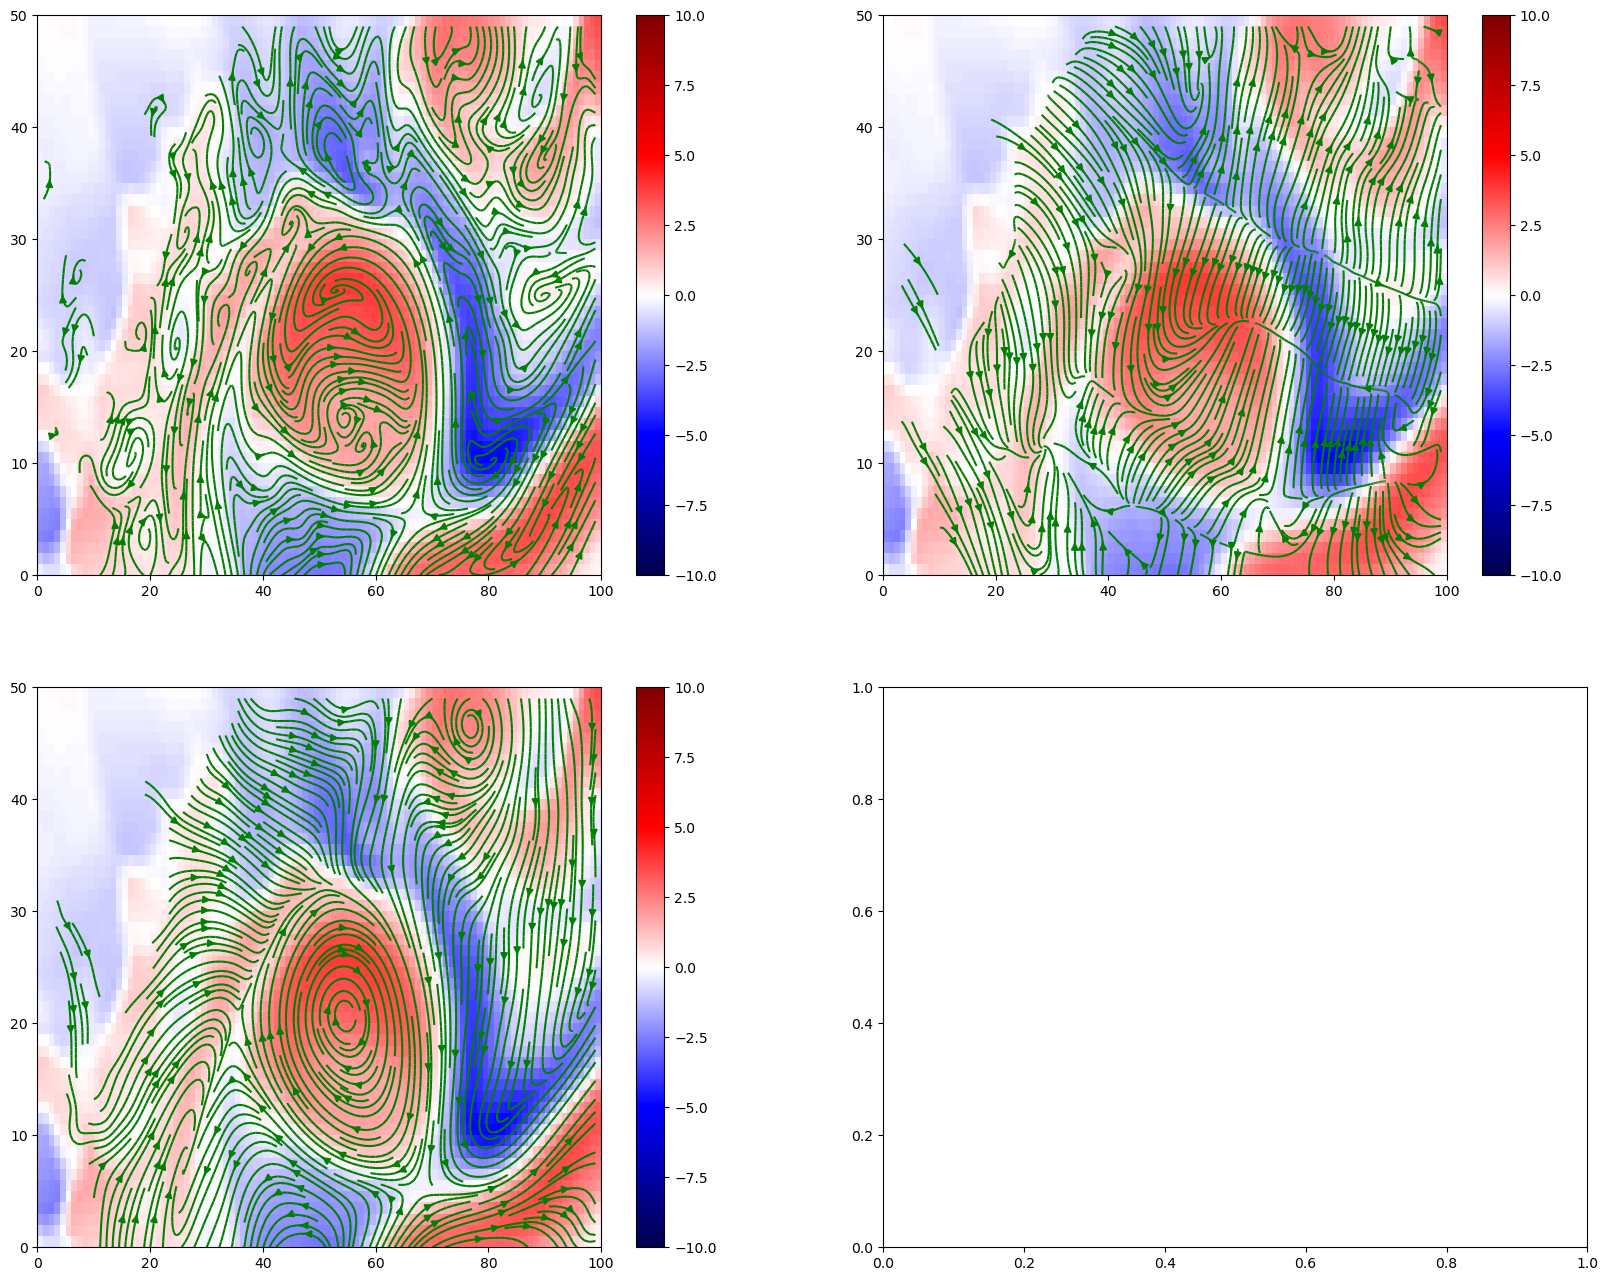

In [24]:
umag = np.sqrt(U**2 + V**2)
umag_orig = np.sqrt(ua_prime**2 + va_prime**2)
umag_orig[mask] = float('nan')

print(np.nanmax(umag),np.nanmax(umag_orig))


y1 = 100
y2 = 150
x1 = 100
x2 = 200

# y1 = 250
# y2 = 300
# x1 = 600
# x2 = 700

# y1 = 100
# y2 = 200
# x1 = 800
# x2 = 900


x = np.arange(0, x2-x1)
y = np.arange(0, y2-y1)


fig, axes = plt.subplots(nrows = 2, ncols=2, figsize = (20,16))

v = 10
pltArr =sst_prime[y1:y2,x1:x2]
ax = axes[0,0]
m = ax.pcolormesh(pltArr, vmin = -v, vmax =v, cmap='seismic')
plt.colorbar(m, ax=ax)
ax.streamplot(x,y, U[y1:y2,x1:x2], V[y1:y2,x1:x2], density = 3, color='green')


ax = axes[0,1]
m = ax.pcolormesh(pltArr, vmin = -v, vmax =v, cmap='seismic')
plt.colorbar(m, ax=ax)
ax.streamplot(x,y, ua_prime[y1:y2,x1:x2], va_prime[y1:y2,x1:x2], density = 3, color='green')

pltArr =sst_prime[y1:y2,x1:x2]
ax = axes[1,0]
m = ax.pcolormesh(pltArr, vmin = -v, vmax =v, cmap='seismic')
plt.colorbar(m, ax=ax)
ax.streamplot(x,y, uo[y1:y2,x1:x2], vo[y1:y2,x1:x2], density = 3, color='green')

# pltArr =div_U[y1:y2,x1:x2]
# v= 1e-4
# ax = axes[1,1]
# m = ax.pcolormesh(pltArr, vmin = -v, vmax =v, cmap='seismic')
# plt.colorbar(m, ax=ax)
# ax.streamplot(x,y, U[y1:y2,x1:x2], V[y1:y2,x1:x2], density = 3, color='green')



13.168204070367784 20.90236516779075
0.327191520300624 1.4362013784877965


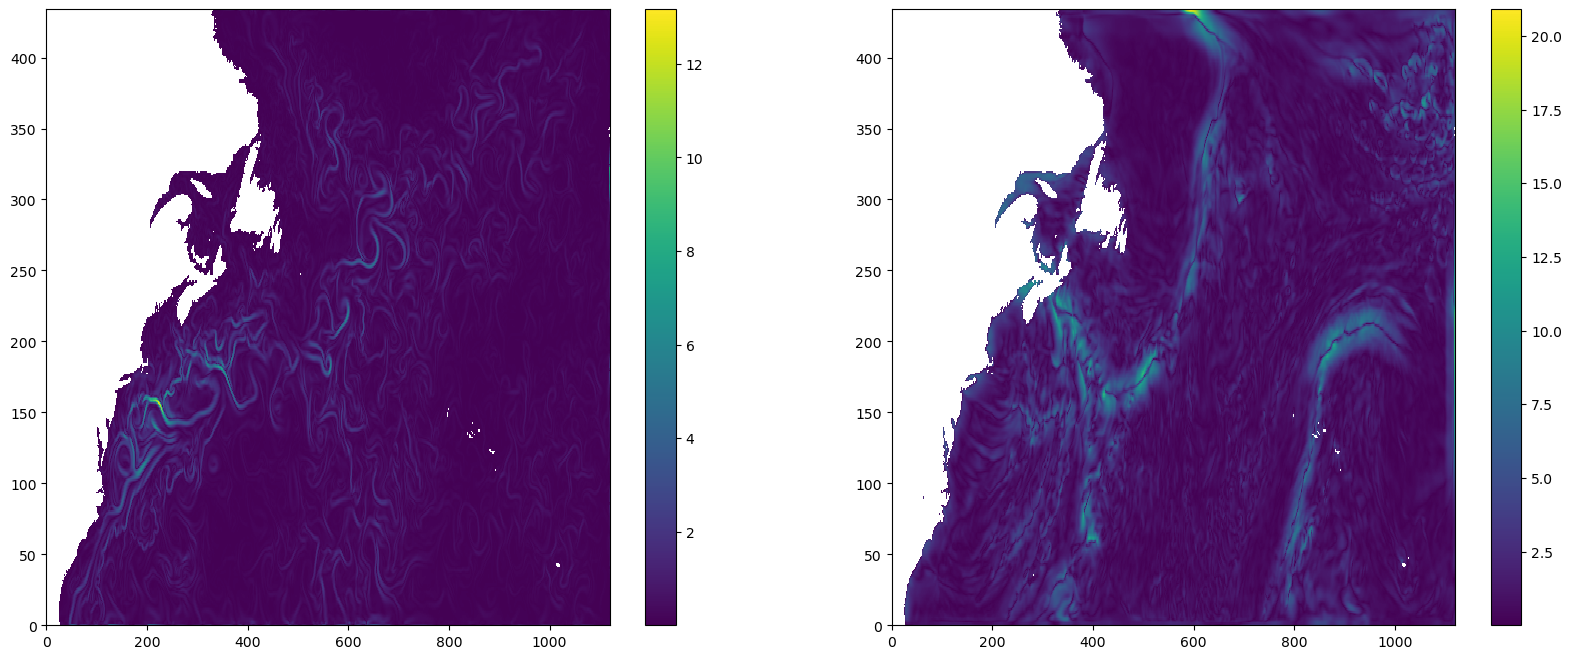

In [25]:
umag = np.sqrt(U**2 + V**2)
umag_orig = np.sqrt(ua_prime**2 + va_prime**2)
umag_orig[mask] = float('nan')

print(np.nanmax(umag),np.nanmax(umag_orig))
print(np.nanmean(umag),np.nanmean(umag_orig))

fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (20,8))

v = 0.01
vv = 2
pltArr = umag.copy()
ax = axes[0]
m = ax.pcolormesh(pltArr)#, vmin = 0, vmax= vv, cmap='tab20c')
plt.colorbar(m, ax=ax)

pltArr =umag_orig.copy()
ax = axes[1]
m = ax.pcolormesh(pltArr)#, vmin = 0, vmax= vv, cmap='tab20c')
plt.colorbar(m, ax=ax)



In [26]:
print(np.corrcoef(umag_orig[~mask].flatten(), umag[~mask].flatten())[0][1],
np.corrcoef(ua_prime[~mask].flatten(), U[~mask].flatten())[0][1],
np.corrcoef(va_prime[~mask].flatten(), V[~mask].flatten())[0][1])

0.01967815545727484 0.03648892402256448 0.017656372190463544


In [27]:
def getCurlAndDiv(u, v, DX, DY):
    dx_u = (np.roll(u,-1,axis=1) - np.roll(u,1,axis=1))/(2*DX)
    dx_v = (np.roll(v,-1,axis=1) - np.roll(v,1,axis=1))/(2*DX)

    dy_u = (np.roll(u,-1,axis=0) - np.roll(u,1,axis=0))/(2*DY)
    dy_v = (np.roll(v,-1,axis=0) - np.roll(v,1,axis=0))/(2*DY)
    
    div_u = dx_u + dy_v
    curl_u = dx_v - dy_u
    
    return curl_u, div_u

In [28]:
dx_ua = (np.roll(ua,-1,axis=1) - np.roll(ua,1,axis=1))/(2*DXU)
dx_va = (np.roll(va,-1,axis=1) - np.roll(va,1,axis=1))/(2*DXU)

dy_ua = (np.roll(ua,-1,axis=0) - np.roll(ua,1,axis=0))/(2*DYU)
dy_va = (np.roll(va,-1,axis=0) - np.roll(va,1,axis=0))/(2*DYU)


dx_U = (np.roll(U,-1,axis=1) - np.roll(U,1,axis=1))/(2*DXU)
dx_V = (np.roll(V,-1,axis=1) - np.roll(V,1,axis=1))/(2*DXU)

dy_U = (np.roll(U,-1,axis=0) - np.roll(U,1,axis=0))/(2*DYU)
dy_V = (np.roll(V,-1,axis=0) - np.roll(V,1,axis=0))/(2*DYU)

In [29]:
div_ua = dx_ua + dy_va
curl_ua = dx_va - dy_ua

div_U = dx_U + dy_V
curl_U = dx_V - dy_U

In [30]:
print(np.nanmax(div_ua), np.nanmin(div_ua), np.nanmean(div_ua))
print(np.nanmax(div_U), np.nanmin(div_U), np.nanmean(div_U))

0.0020943930752037607 -0.0021673374539375387 8.484695540416634e-09
0.00016588044696706864 -0.0002836804781364827 1.1463215080071299e-08


In [31]:
print(np.nanmax(curl_ua), np.nanmin(curl_ua),np.nanmean(curl_ua))
print(np.nanmax(curl_U), np.nanmin(curl_U),np.nanmean(curl_U))

0.0021137314272344663 -0.0011309032051308695 1.9813487179843316e-07
0.001055262549133153 -0.0012318879343557977 -6.452729182185491e-08


In [32]:
n = 100
ds = Dataset('../VelPrime_data_crseAtm_inst_2p5deg.nc')
UA_prime = np.array(ds.variables['ua_prime'][n,:,:])
VA_prime = np.array(ds.variables['va_prime'][n,:,:])
UA_prime[mask] = float('nan')
VA_prime[mask] = float('nan')

ds.close()

In [33]:
V_orig = V.copy()
U_orig = U.copy()

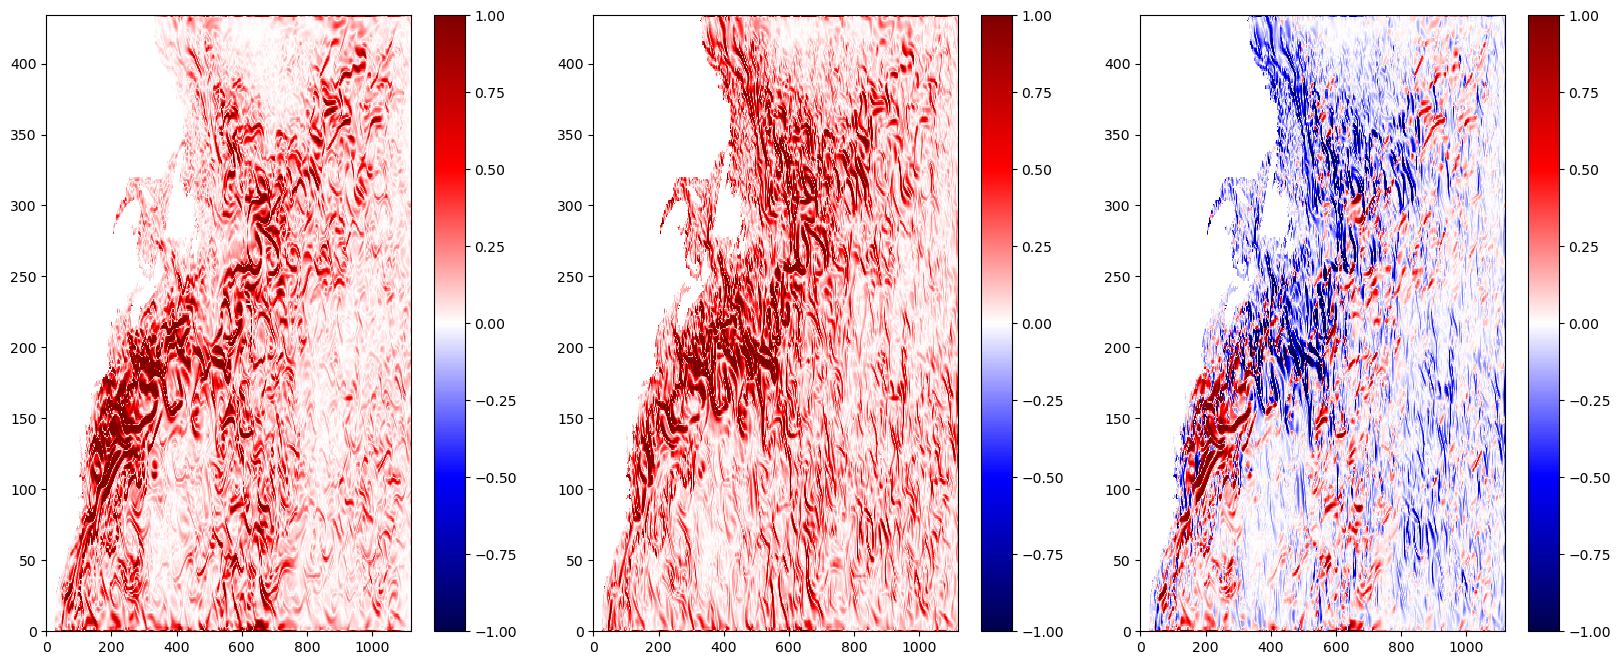

In [34]:
U = U_orig.copy()

fig, axes = plt.subplots(nrows = 1, ncols=3, figsize = (20,8))

#U = U.copy()*0.167
cmap = plt.get_cmap('seismic').copy()
v = 1#np.nanmax(V - VA_prime)*0.7
pltArr = U.copy()
ax = axes[0]
m = ax.pcolormesh(abs(pltArr),vmin = -v, vmax = v, cmap=cmap)
plt.colorbar(m, ax=ax)

pltArr =UA_prime.copy()
ax = axes[1]
m = ax.pcolormesh(abs(pltArr),vmin = -v, vmax = v, cmap=cmap)
plt.colorbar(m, ax=ax)


pltArr =abs(U) - abs(UA_prime)
ax = axes[2]
m = ax.pcolormesh(pltArr,vmin = -v, vmax = v, cmap=cmap)
plt.colorbar(m, ax=ax)

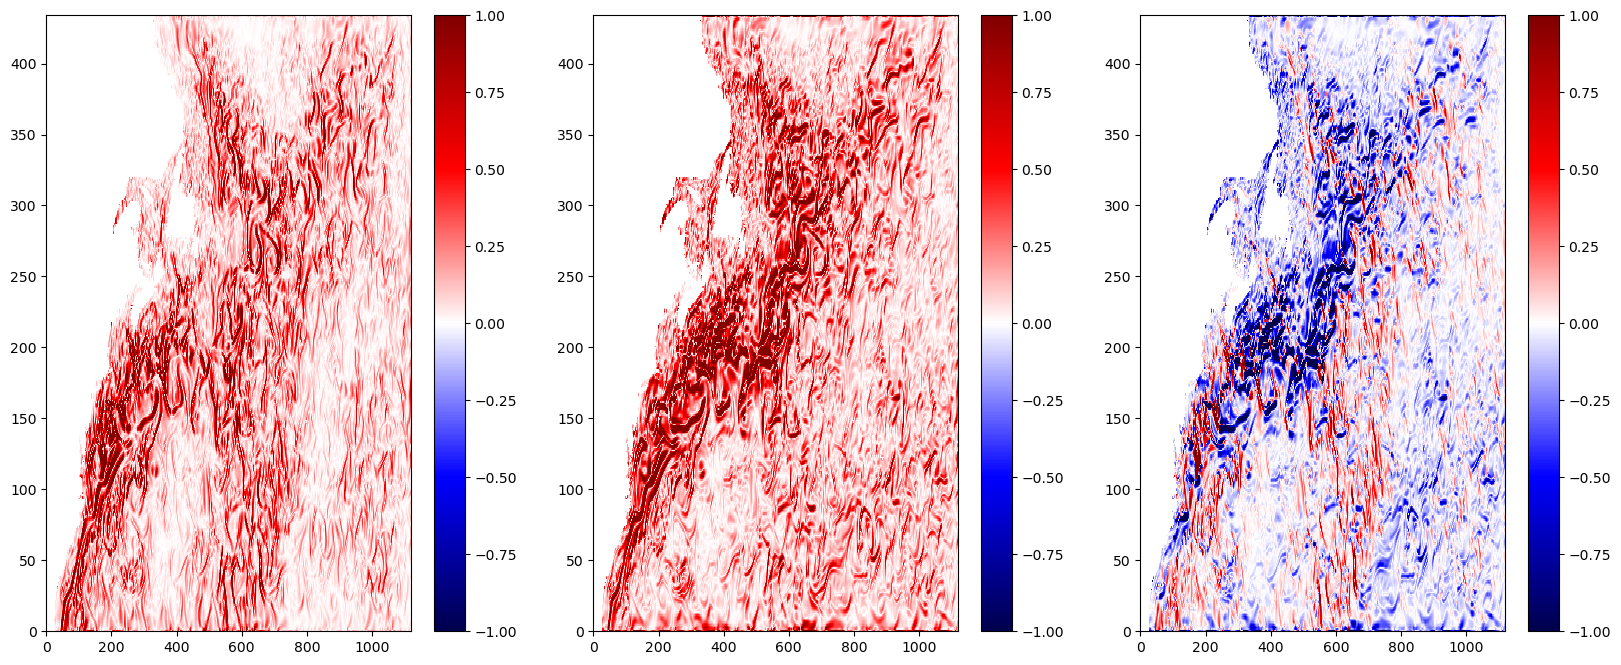

In [35]:
V = V_orig.copy()

fig, axes = plt.subplots(nrows = 1, ncols=3, figsize = (20,8))

#V = V.copy()*0.167
cmap = plt.get_cmap('seismic').copy()
v = 1#np.nanmax(V - VA_prime)*0.7
pltArr = V.copy()
ax = axes[0]
m = ax.pcolormesh(abs(pltArr),vmin = -v, vmax = v, cmap=cmap)
plt.colorbar(m, ax=ax)

pltArr =VA_prime.copy()
ax = axes[1]
m = ax.pcolormesh(abs(pltArr),vmin = -v, vmax = v, cmap=cmap)
plt.colorbar(m, ax=ax)


pltArr =abs(V) - abs(VA_prime)
ax = axes[2]
m = ax.pcolormesh(pltArr,vmin = -v, vmax = v, cmap=cmap)
plt.colorbar(m, ax=ax)

13.168204070367784 11.133900954360271
0.327191520300624 0.41560841702216483


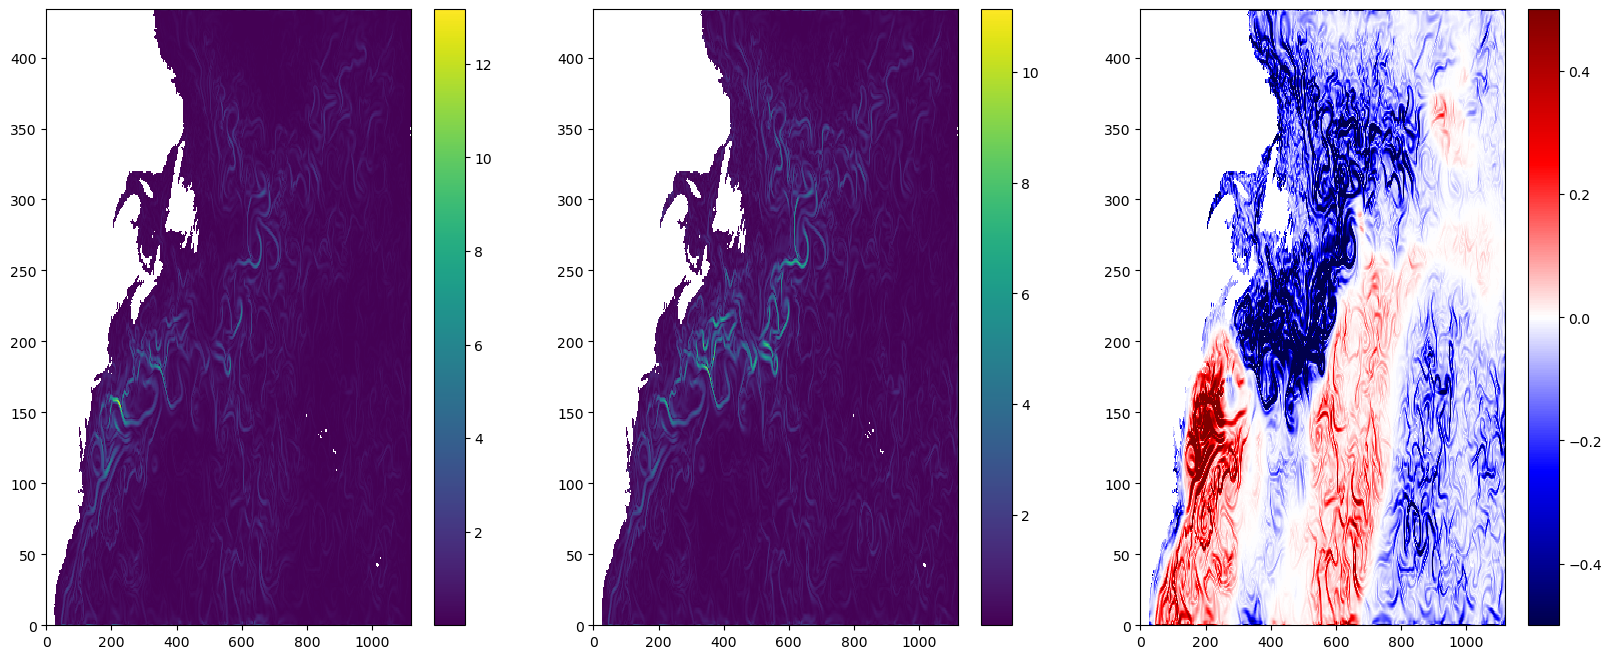

In [36]:
umag = np.sqrt(U**2 + V**2)
umag_orig = np.sqrt(ua_prime**2 + va_prime**2)
umag_orig[mask] = float('nan')

umag_file = np.sqrt(UA_prime**2 + VA_prime**2)

print(np.nanmax(umag),np.nanmax(umag_file))
print(np.nanmean(umag),np.nanmean(umag_file))

fig, axes = plt.subplots(nrows = 1, ncols=3, figsize = (20,8))
cmap = plt.get_cmap('seismic').copy()

v = 0.5
vv = 2
pltArr = umag.copy()
ax = axes[0]
m = ax.pcolormesh(pltArr)#, vmin = 0, vmax= vv, cmap='tab20c')
plt.colorbar(m, ax=ax)

pltArr =umag_file.copy()
ax = axes[1]
m = ax.pcolormesh(pltArr)#, vmin = 0, vmax= vv, cmap='tab20c')
plt.colorbar(m, ax=ax)

pltArr =umag - umag_file

ax = axes[2]
m = ax.pcolormesh(pltArr,vmin = -v, vmax = v, cmap=cmap)
plt.colorbar(m, ax=ax)


In [37]:
curl_file, div_file = getCurlAndDiv(UA_prime, VA_prime, DXU, DYU)

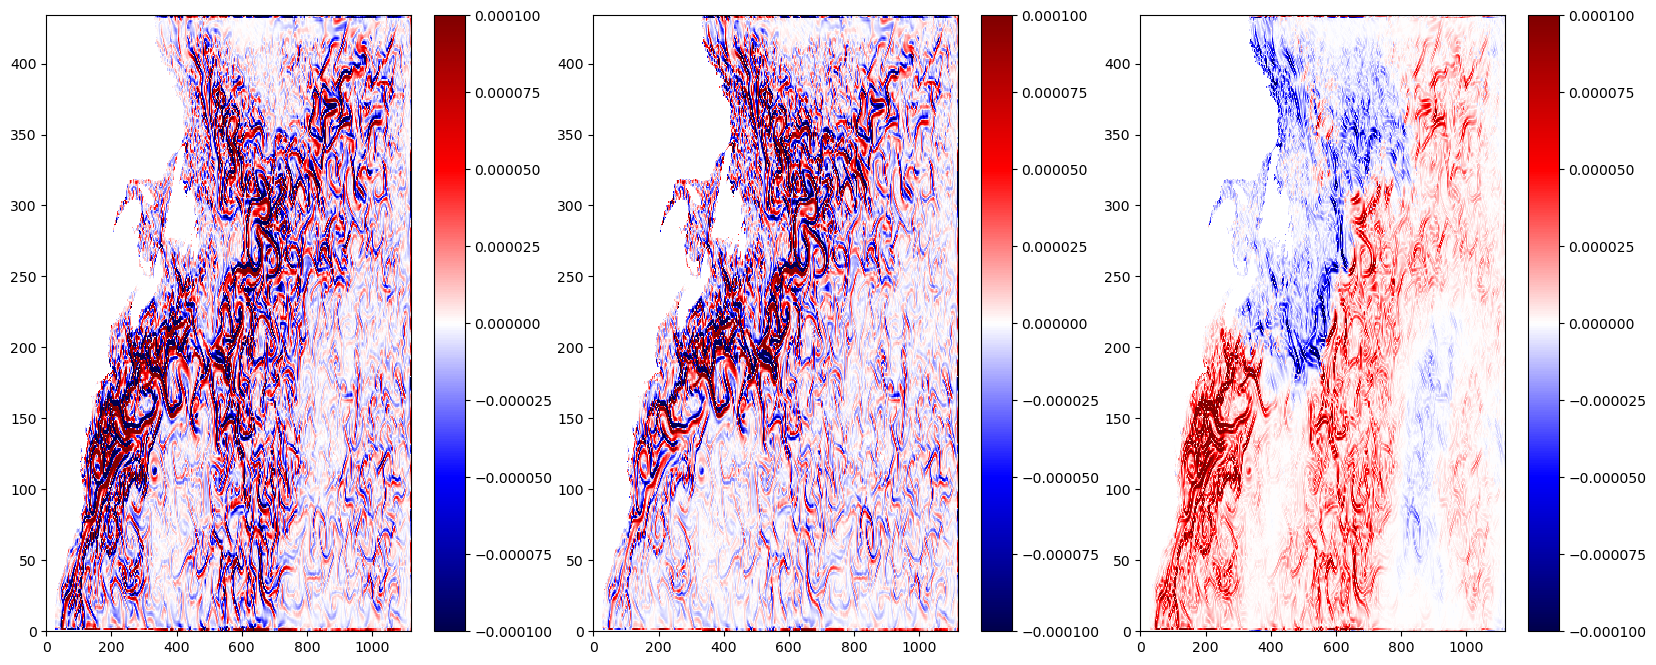

In [38]:
fig, axes = plt.subplots(nrows = 1, ncols=3, figsize = (20,8))
cmap = plt.get_cmap('seismic').copy()

v = 0.0001
vv = 2
pltArr = curl_U.copy()
ax = axes[0]
m = ax.pcolormesh(pltArr, vmin = -v, vmax= v, cmap=cmap)
plt.colorbar(m, ax=ax)

pltArr = curl_file.copy()
ax = axes[1]
m = ax.pcolormesh(pltArr, vmin = -v, vmax= v, cmap=cmap)
plt.colorbar(m, ax=ax)

pltArr = abs(curl_U) - abs(curl_file)#curl_U - curl_file 
ax = axes[2]
m = ax.pcolormesh(pltArr,vmin = -v, vmax = v, cmap=cmap)
plt.colorbar(m, ax=ax)


In [39]:
20e3/5/(3600)

1.1111111111111112

In [40]:
h = np.max(sst_prime) * nn * (1 - gamma/2) * H

In [41]:
nn

0.003472222222222222

In [42]:
gardh_prime = 0.002

In [43]:
np.nanmax(np.abs(M))*np.nanmax(np.abs(dx_h_prime)) * nn * H/2 *(1-2*gamma/3) * np.nanmax(np.abs(dx_sst_prime))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
H

array([[ 9.25360068,  9.29344395,  9.40931407, ..., 20.35159431,
        20.24472644, 20.17833205],
       [ 9.23349351,  9.27366336,  9.38999212, ..., 20.35524441,
        20.2469698 , 20.17988577],
       [ 9.19764978,  9.23816887,  9.35515613, ..., 20.36907211,
        20.25874991, 20.19054206],
       ...,
       [29.60531173, 29.61154177, 29.62984052, ..., 85.11600049,
        85.31191078, 85.43870148],
       [29.51794458, 29.52444652, 29.54350167, ..., 84.69171076,
        84.89570163, 85.03265609],
       [29.47844955, 29.4850952 , 29.50454976, ..., 84.47514317,
        84.68736477, 84.83253196]])

In [45]:
np.nanmax(M)

13338.772507764157

In [46]:
np.nanmax(M)

13338.772507764157

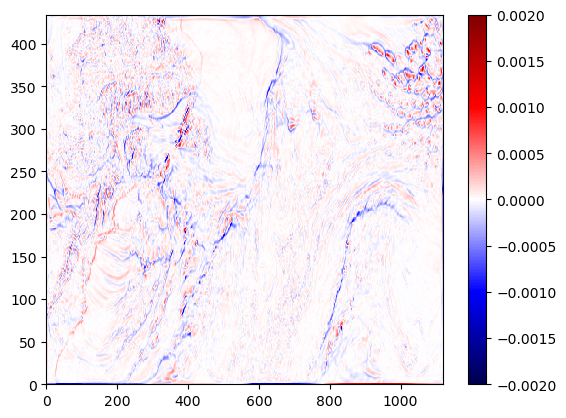

In [47]:
v = 0.002
plt.pcolormesh(div_ua, vmin=-v, vmax=v , cmap='seismic')
plt.colorbar()

In [48]:
5/(273+15)

0.017361111111111112

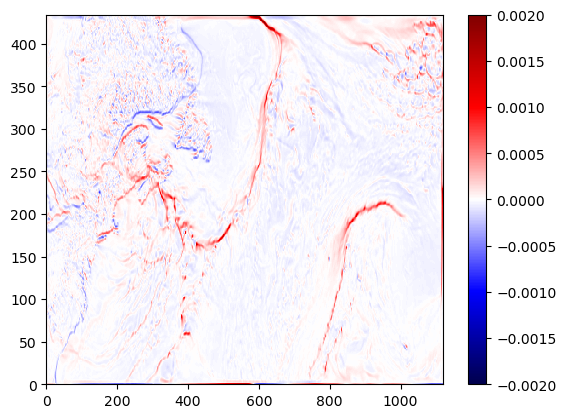

In [49]:
v = 0.002
plt.pcolormesh(curl_ua, vmin=-v, vmax=v , cmap='seismic')
plt.colorbar()

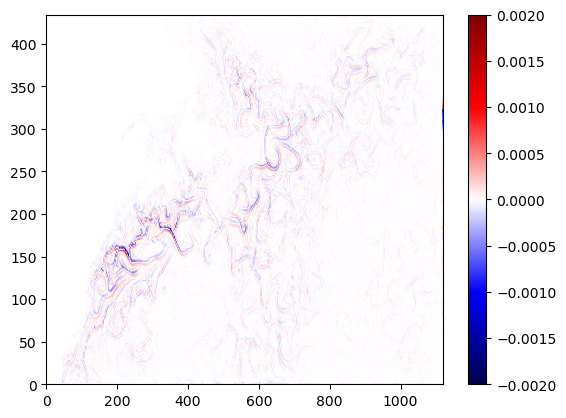

In [50]:
v = 0.002
plt.pcolormesh(curl_U, vmin=-v, vmax=v , cmap='seismic')
plt.colorbar()

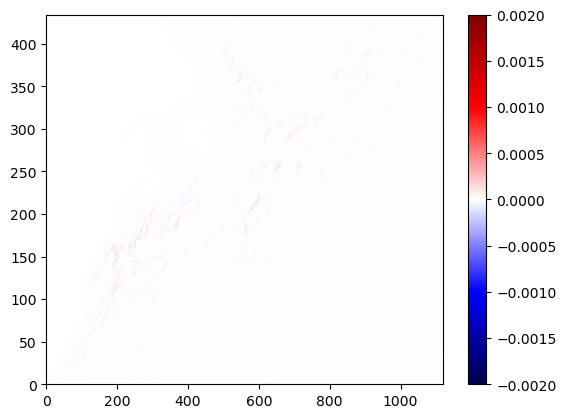

In [51]:
v = 0.002
plt.pcolormesh(div_U, vmin=-v, vmax=v , cmap='seismic')
plt.colorbar()

In [52]:
0.167/0.5

0.334

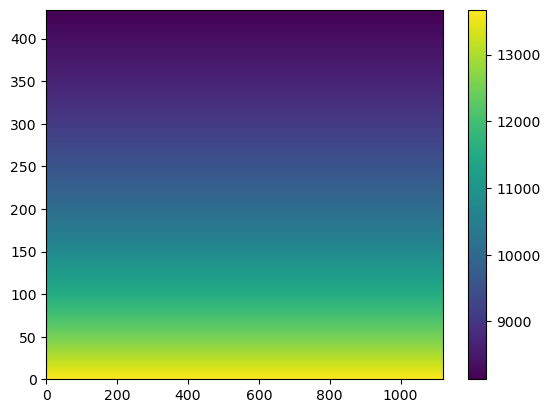

In [53]:
plt.pcolormesh(1/f)
plt.colorbar()

In [54]:
t = np.mean(2*np.pi/f)

In [55]:
np.sqrt(t * 0.1)

80.16949795395486

In [56]:
t/3600

17.853190006081032

In [57]:
H = np.sqrt(2*np.pi/f * 0.1)

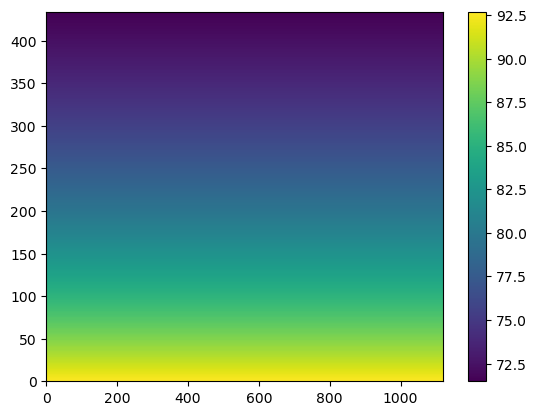

In [58]:
plt.pcolormesh(H)
plt.colorbar()

In [59]:
np.sqrt(5 * 3 *3600)

232.379000772445

In [60]:
6.5/1000

0.0065

In [61]:
a = np.arange(5)
np.roll(a,-1)

array([1, 2, 3, 4, 0])